# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_new_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [5]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [6]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

In [7]:
from collections import Counter
my_counter = Counter()
for word in project_data['school_state'].values:
    my_counter.update(word.split())
state_dict = dict(my_counter)
sorted_state_dict = dict(sorted(state_dict.items(), key=lambda kv: kv[1]))

In [8]:
from collections import Counter
my_counter = Counter()
for word in project_data['teacher_prefix'].values:
    my_counter.update(word.split())
prefix_dict = dict(my_counter)
sorted_prefix_dict = dict(sorted(prefix_dict.items(), key=lambda kv: kv[1]))

In [9]:
catogories = list(project_data['project_grade_category'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
pgc_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    pgc_list.append(temp.strip())
    
project_data['clean_pgc'] = pgc_list
project_data.drop(['project_grade_category'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_pgc'].values:
    my_counter.update(word.split())

pgc_dict = dict(my_counter)
sorted_pgc_dict = dict(sorted(pgc_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [10]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [11]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0           0  p036502  484aaf11257089a66cfedc9461c6bd0a            Ms.   
1           3  p185307  525fdbb6ec7f538a48beebaa0a51b24f            Mr.   

  school_state project_submitted_datetime  \
0           NV           18-11-2016 14:45   
1           NC           12-08-2016 15:42   

                                       project_title  \
0                           Super Sight Word Centers   
1  \"Kid Inspired\" Equipment to Increase Activit...   

                                     project_essay_1  \
0  Most of my kindergarten students come from low...   
1  My students are the greatest students but are ...   

                                     project_essay_2 project_essay_3  \
0  I currently have a differentiated sight word c...             NaN   
1  The student's project which is totally \"kid-i...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need 6 Ipod Nano's to create and d...   
1             NaN  My students need balls and other activity equi...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                            26                    1   
1                                            16                    0   

    clean_categories clean_subcategories     clean_pgc  \
0  Literacy_Language            Literacy  GradesPreK-2   
1      Health_Sports     Health_Wellness     Grades3-5   

                                               essay  
0  Most of my kindergarten students come from low...  
1  My students are the greatest students but are ...

In [12]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

Most of my kindergarten students come from low-income households and are considered \"at-risk\". These kids walk to school alongside their parents and most have never been further than walking distance from their house. For 80% of my students, English is not their first language or the language spoken at home. \r\n\r\nWhile my kindergarten kids have many obstacles in front of them, they come to school each day excited and ready to learn. Most students started the year out never being in a school setting. At the start of the year many had never been exposed to letters. Each day they soak up more knowledge and try their hardest to succeed. They are highly motivated to learn new things every day. We are halfway through the year and they are starting to take off. They know know all letters, some sight words, numbers to 20, and a majority of their letter sounds because of their hard work and determination. I am excited to see the places we will go from here!I currently have a differentiated

Many of our students walk into their classrooms excited and always ready to tackle their work day! The students at this K-5 school are given opportunities to grow and are always encouraged to be themselves! Our students are comprised of many different backgrounds and cultures. Our teachers and staff always make our students their number one priority. \r\n\r\nThe students at our school are unique and amazing in their own way. Every day they take on their school challenges and try their best to succeed. No matter what our teachers embrace and support the students for their efforts. Our students know they can count on us as teachers and staff and we know that we can count on them to learn and succeed.\r\n\r\n\r\nThese students participate in our Positive Behavior Support (PBS) program to increase academic performance, increase safety, decrease problem behavior and establish positive school outcomes. PBS is a researched based positive intervention system that is used to create and support 

In [13]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [14]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

Chicago schools, like many urban school districts across America, have been fighting against the challenges of the current state of education; severe budget cuts, lack of resources, increased classroom sizes, lead in the drinking water, and many others. When basic needs in school are not being met, the power of education to transform our young people is hindered.  \r\n\r\nIn a few short weeks, I am proud to be joining the team of education warriors as I will be stepping into my own classroom as a first year teacher. My new school, being both 98% African American and 75% low income, faces many challenges similar to the other schools in Chicago. \r\n\r\nI am thrilled to be working with a group of about 90 eager 4th grade readers and writers. Like every child, regardless of race or socioeconomic background, they deserve the best teachers, education, and resources. It is the job of myself, my fellow teachers and staff of my school to make sure that happens. Despite these challenges, I am d

In [15]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

Chicago schools, like many urban school districts across America, have been fighting against the challenges of the current state of education; severe budget cuts, lack of resources, increased classroom sizes, lead in the drinking water, and many others. When basic needs in school are not being met, the power of education to transform our young people is hindered.      In a few short weeks, I am proud to be joining the team of education warriors as I will be stepping into my own classroom as a first year teacher. My new school, being both 98% African American and 75% low income, faces many challenges similar to the other schools in Chicago.     I am thrilled to be working with a group of about 90 eager 4th grade readers and writers. Like every child, regardless of race or socioeconomic background, they deserve the best teachers, education, and resources. It is the job of myself, my fellow teachers and staff of my school to make sure that happens. Despite these challenges, I am dedicated

In [16]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

Chicago schools like many urban school districts across America have been fighting against the challenges of the current state of education severe budget cuts lack of resources increased classroom sizes lead in the drinking water and many others When basic needs in school are not being met the power of education to transform our young people is hindered In a few short weeks I am proud to be joining the team of education warriors as I will be stepping into my own classroom as a first year teacher My new school being both 98 African American and 75 low income faces many challenges similar to the other schools in Chicago I am thrilled to be working with a group of about 90 eager 4th grade readers and writers Like every child regardless of race or socioeconomic background they deserve the best teachers education and resources It is the job of myself my fellow teachers and staff of my school to make sure that happens Despite these challenges I am dedicated to teaching the strongest cultural

In [17]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [18]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 109248/109248 [01:43<00:00, 1054.53it/s]


In [19]:
# after preprocesing
preprocessed_essays[20000]

'chicago schools like many urban school districts across america fighting challenges current state education severe budget cuts lack resources increased classroom sizes lead drinking water many others when basic needs school not met power education transform young people hindered in short weeks i proud joining team education warriors i stepping classroom first year teacher my new school 98 african american 75 low income faces many challenges similar schools chicago i thrilled working group 90 eager 4th grade readers writers like every child regardless race socioeconomic background deserve best teachers education resources it job fellow teachers staff school make sure happens despite challenges i dedicated teaching strongest culturally relevant identity confirming social justice curriculum i people not realize man whole life changed one book malcolm x do remember reading one book elementary school changed life there good chance able relate character book but happens schools predominantl

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [20]:
# similarly you can preprocess the titles also
# similarly you can preprocess the titles also
from tqdm import tqdm
preprocessed_project_titles = []
# tqdm is for printing the status bar
for sentence in tqdm(project_data['project_title'].values):
    sent = decontracted(sentence)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_project_titles.append(sent.lower().strip())

100%|██████████| 109248/109248 [00:04<00:00, 24167.40it/s]


## 1.5 Preparing data for models

In [21]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'clean_pgc', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [22]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
categories_one_hot = vectorizer.fit_transform(project_data['clean_categories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (109248, 9)


In [23]:
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_categories_one_hot = vectorizer.fit_transform(project_data['clean_subcategories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (109248, 30)


In [24]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_state_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['school_state'].values)
print(vectorizer.get_feature_names())


state_one_hot = vectorizer.transform(project_data['school_state'].values)
print("Shape of matrix after one hot encodig ",state_one_hot.shape)

['VT', 'WY', 'ND', 'MT', 'RI', 'SD', 'NE', 'DE', 'AK', 'NH', 'WV', 'ME', 'HI', 'DC', 'NM', 'KS', 'IA', 'ID', 'AR', 'CO', 'MN', 'OR', 'KY', 'MS', 'NV', 'MD', 'CT', 'TN', 'UT', 'AL', 'WI', 'VA', 'AZ', 'NJ', 'OK', 'WA', 'MA', 'LA', 'OH', 'MO', 'IN', 'PA', 'MI', 'SC', 'GA', 'IL', 'NC', 'FL', 'NY', 'TX', 'CA']
Shape of matrix after one hot encodig  (109248, 51)


In [25]:
vectorizer = CountVectorizer(vocabulary=list(sorted_pgc_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['clean_pgc'].values)
print(vectorizer.get_feature_names())
project_grade_category_one_hot = vectorizer.transform(project_data['clean_pgc'].values)
print("Shape of matrix after one hot encoding ",project_grade_category_one_hot.shape)

['Grades9-12', 'Grades6-8', 'Grades3-5', 'GradesPreK-2']
Shape of matrix after one hot encoding  (109248, 4)


In [26]:
vectorizer = CountVectorizer(vocabulary=list(sorted_prefix_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['teacher_prefix'].values)
print(vectorizer.get_feature_names())
teacher_prefix_one_hot = vectorizer.transform(project_data['teacher_prefix'].values)
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot.shape)

['Dr.', 'Teacher', 'Mr.', 'Ms.', 'Mrs.']
Shape of matrix after one hot encodig  (109248, 5)


# 1.4.2 Vectorizing Text data

From previous assignments its been observed that BOW has best AUC

# 1.4.2.1 Bag of words

In [27]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_bow.shape)

Shape of matrix after one hot encodig  (109248, 16623)


In [28]:
text=project_data['essay'][0:5000]
text.shape

(5000,)

# <h4><font color='red'> 1.4.2.2 Bag of Words on `project_title`</font></h4>


In [29]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it
vectorizer = CountVectorizer(min_df=10)
text_bow_p_t= vectorizer.fit_transform(preprocessed_project_titles)
print("Shape of matrix after one hot encodig ",text_bow_p_t.shape)

Shape of matrix after one hot encodig  (109248, 3329)


### 1.5.3 Vectorizing Numerical features

In [30]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [31]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

Mean : 298.11934259666083, Standard deviation : 367.49634838483496


In [32]:
price_standardized

array([[ 0.00506306],
       [ 1.05130475],
       [ 0.15613939],
       ...,
       [ 0.6823487 ],
       [-0.12157765],
       [ 0.10851987]])

In [33]:
price_scalar.fit(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
teacher_number_of_previously_posted_projects_standardized = price_scalar.transform(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
teacher_number_of_previously_posted_projects_standardized

Mean : 11.153211042765085, Standard deviation : 27.777015452500134


array([[ 0.53449907],
       [ 0.17448919],
       [ 1.11051488],
       ...,
       [-0.36552563],
       [-0.36552563],
       [-0.36552563]])

### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [34]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X = hstack((categories_one_hot, sub_categories_one_hot, state_one_hot, project_grade_category_one_hot,teacher_prefix_one_hot,price_standardized,text_bow,text_bow_p_t,teacher_number_of_previously_posted_projects_standardized)).tocsr()
X.shape

(109248, 20053)

# Assignment 10: Clustering

- <font color='red'>step 1</font>: Choose any vectorizer (data matrix) that you have worked in any of the assignments, and got the best AUC value.
- <font color='red'>step 2</font>: Choose any of the <a href='https://scikit-learn.org/stable/modules/feature_selection.html'>feature selection</a>/<a href='https://scikit-learn.org/stable/modules/decomposition.html'>reduction algorithms</a> ex: selectkbest features, pretrained word vectors, model based feature selection etc and reduce the number of features to 5k features
- <font color='red'>step 3</font>: Apply all three kmeans, Agglomerative clustering, DBSCAN
    - <strong>K-Means Clustering:</strong> <br>
        ● Find the best ‘k’ using the elbow-knee method (plot k vs inertia_)<br>
    - <strong>Agglomerative Clustering: </strong><br>
        ● Apply <a href='https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/'>agglomerative algorithm</a> and try a different number of clusters like 2,5 etc. <br>
        ● You can take less data points (as this is very computationally expensive one) to perform hierarchical clustering because they do take a considerable amount of time to run. <br>
    - <strong>DBSCAN Clustering: </strong><br>
        ● Find the best ‘eps’ using the <a href='https://stackoverflow.com/a/48558030/4084039'>elbow-knee method</a>.<br>
        ● You can take a smaller sample size for this as well.
- <font color='red'>step 4</font>: Summarize each cluster by manually observing few points from each cluster.
- <font color='red'>step 5</font>: You need to plot the word cloud with essay text for each cluster for each of algorithms mentioned in <font color='red'>step 3</font>.

<h1>2. Clustering </h1>

<h2>2.4 Dimensionality Reduction on the selected features </h2>

Since we are considering only 5k points we will consider only 500 best features.We use PCA for dimensionality reduction

In [35]:
from sklearn import decomposition
X=X.tocsr()
S_new = X[0:5000,:]
S_new = S_new.toarray()
pca = decomposition.PCA(n_components=500)
# Fit the PCA and transform the data
X_pca = pca.fit_transform(S_new)

In [36]:
X_pca.shape

(5000, 500)

<h2>2.5 Apply Kmeans</h2>

Finding best K value

In [40]:
from sklearn.cluster import KMeans

In [54]:

k_values = [2,3,4,5,6,7,8,9,10]
loss_value = []
for i in k_values:
    clf= KMeans(n_clusters=i, n_jobs=-1)
    clf.fit(X_pca)
    kmeans=clf.inertia_
    loss_value.append(kmeans)

ELBOW METHOD

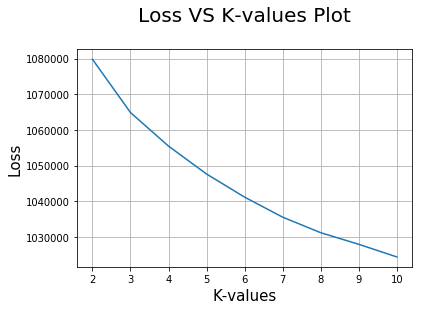

In [55]:
#Draw Loss VS K values plot
plt.plot(k_values, loss_value)
plt.xlabel('K-values',size=15)
plt.ylabel('Loss',size=15)
plt.title('Loss VS K-values Plot\n',size=20)
plt.grid()
plt.show()

From Graph we can conclude that K=3 is best hyperparameter

In [41]:
kmean_bow= KMeans(n_clusters=3, n_jobs=-1)
s=kmean_bow.fit(X_pca)

Creating word cloud using essay

In [42]:
def word_cloud(essay):
    from wordcloud import WordCloud, STOPWORDS
    comment_words = ' '
    stopwords = set(STOPWORDS)
    for val in essay :
        val = str(val)
        tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    for words in tokens :
        comment_words = comment_words + words + ' '
    wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords =
    stopwords,min_font_size = 10).generate(comment_words)
    plt.figure(figsize = (6, 6), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()
    


In [43]:
word_bow = text.values

Assigning reviews to clusters

In [44]:
cluster1 = []
cluster2 = []
cluster3 = []


for i in range(s.labels_.shape[0]):
    if s.labels_[i] == 0:
        cluster1.append(word_bow[i])
    elif s.labels_[i] == 1:
        cluster2.append(word_bow[i])
    elif s.labels_[i] == 2:
        cluster3.append(word_bow[i])
    else:
        cluster4.append(word_bow[i])
    
        
# Number of reviews in different clusters
print("No. of reviews in Cluster-1 : ",len(cluster1))
print("No. of reviews in Cluster-2 : ",len(cluster2))
print("No. of reviews in Cluster-3 : ",len(cluster3))


No. of reviews in Cluster-1 :  1699
No. of reviews in Cluster-2 :  2740
No. of reviews in Cluster-3 :  561


Printing word cloud for cluster 1

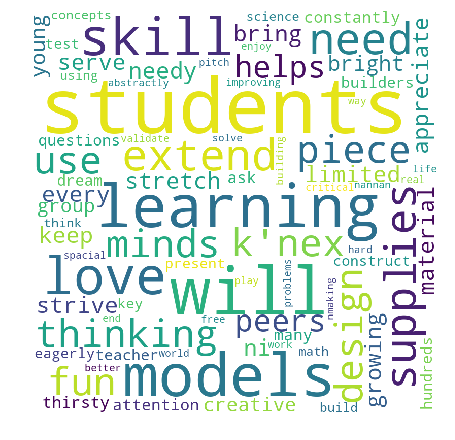

In [89]:
word_cloud(cluster1)

The reviews in this cluster are more related to social life of student with his batchmates and teachers.

Printing word cloud for cluster 2

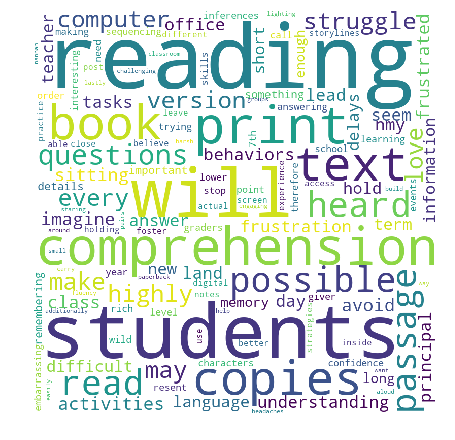

In [90]:
word_cloud(cluster2)

Observation:
    The reviews in this cluster have words that are more related to a students life inside a classroom.

Printing word cloud for cluster 3

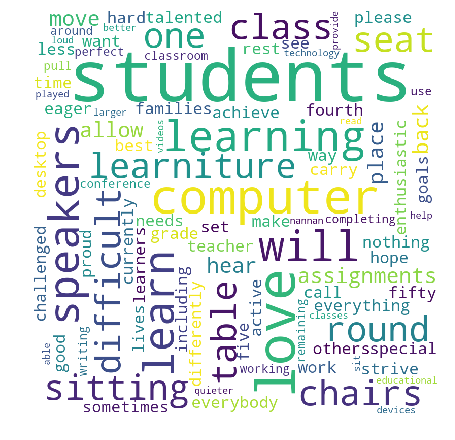

In [91]:
word_cloud(cluster3)

Observation:
    In this cluster the words are more related to qualities and materials a student should have while studying in school.

<h2>2.6 Apply AgglomerativeClustering</h2>

In [58]:
from sklearn.cluster import AgglomerativeClustering
model1 = AgglomerativeClustering(n_clusters=2).fit(X_pca)

In [93]:
text_agglo=text[0:5000].values
text_agglo.shape

(5000,)

Assigning reviews to clusters

In [94]:
cluster1 = []
cluster2 = []

for i in range(model1.labels_.shape[0]):
    if model1.labels_[i] == 0:
        cluster1.append(text_agglo[i])
    else :
        cluster2.append(text_agglo[i])
         
# Number of reviews in different clusters
print("No. of reviews in Cluster-1 : ",len(cluster1))
print("No. of reviews in Cluster-2 : ",len(cluster2))

No. of reviews in Cluster-1 :  2926
No. of reviews in Cluster-2 :  2074


Printing cluster1 wordcloud

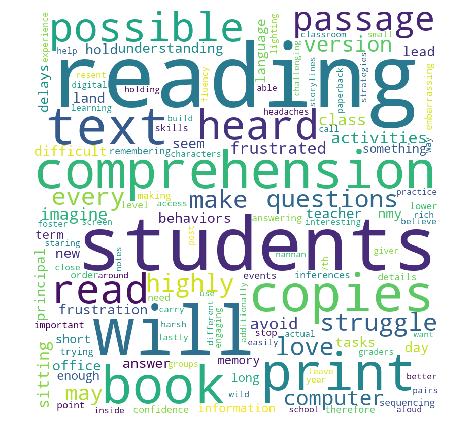

In [95]:
word_cloud(cluster1)

Observation:
    Materials required for academics are mentioned in reviews

Printing word cloud for cluster 2

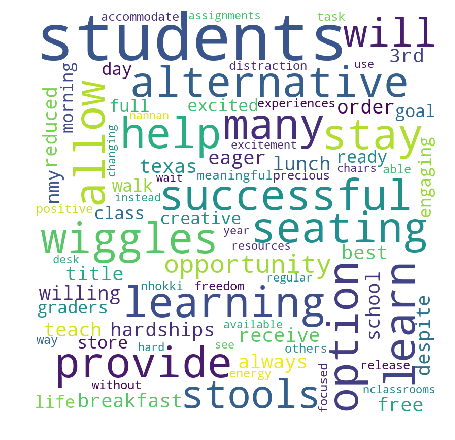

In [96]:
word_cloud(cluster2)

In [ ]:
Observation:
    The reviews in cluster are more related to qualities a good student must have.

Observation:
    there are words that are frequently repeated such as student,learning,learn,class,questions,interesting and teacher are repeating in both clusters.

# Agglomerative Clusterng for n_clusters=5

In [59]:
model2 = AgglomerativeClustering(n_clusters=5).fit(X_pca)

In [132]:
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
cluster5 = []

for i in range(model2.labels_.shape[0]):
    if model2.labels_[i] == 0:
        cluster1.append(text_agglo[i])
    elif model2.labels_[i] == 1:
        cluster2.append(text_agglo[i])
    elif model2.labels_[i] == 2:
        cluster3.append(text_agglo[i])
    elif model2.labels_[i] == 3:
        cluster4.append(text_agglo[i])
    else:
        cluster5.append(text_agglo[i])
    
         
         
# Number of reviews in different clusters
print("No. of reviews in Cluster-1 : ",len(cluster1))
print("No. of reviews in Cluster-2 : ",len(cluster2))
print("No. of reviews in Cluster-3 : ",len(cluster3))
print("No. of reviews in Cluster-4 : ",len(cluster4))
print("No. of reviews in Cluster-5 : ",len(cluster5))


No. of reviews in Cluster-1 :  2074
No. of reviews in Cluster-2 :  1939
No. of reviews in Cluster-3 :  606
No. of reviews in Cluster-4 :  211
No. of reviews in Cluster-5 :  170


Printing word cloud for cluster 1

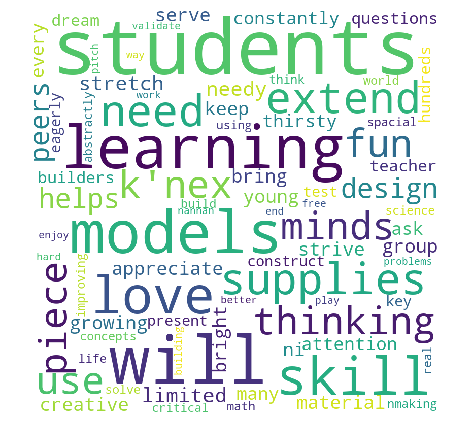

In [103]:
word_cloud(cluster1)

Observation:
    This cluster has reviews which have words that are related to social skills a student should have.

Printing word cloud for cluster 2

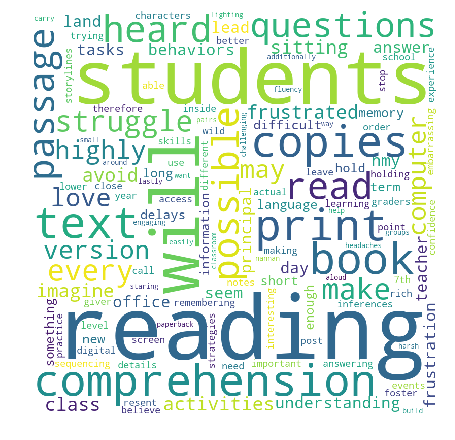

In [104]:
word_cloud(cluster2)

Observation:
        The reviews in this cluster have words that we observe here are mostly related to academics and materials used for studies.

Printing word cloud for cluster 3

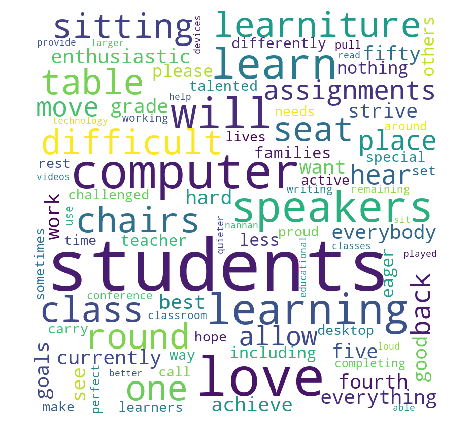

In [105]:
word_cloud(cluster3)

Observation:
    in this cluster the reviews have words that are more related to students life in classroom

Printing word cloud for cluster 4

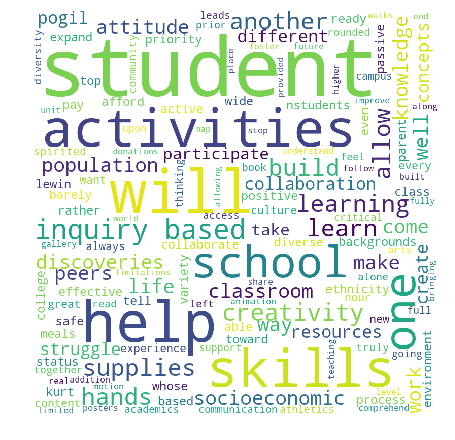

In [133]:
word_cloud(cluster4)

Observation:
    The reviews in cluster have words which are more related to skills a student must have.

Printing word cloud for cluster 5

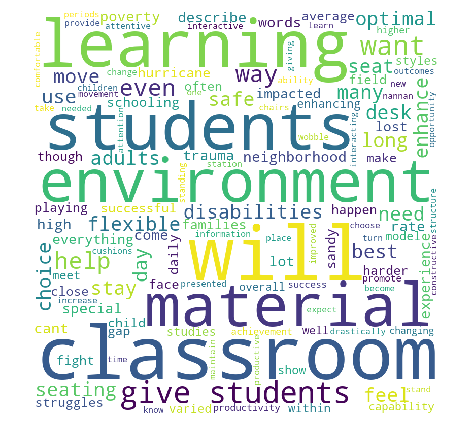

In [107]:
word_cloud(cluster5)

Observation:
the reviews in this cluster have words which are combination of other 4 cluster reviews.

<h2>2.7 Apply DBSCAN</h2>

In [80]:
# Function definition for implementing DBSCAN
def dbscan(eps, samples, X):
    from sklearn.cluster import DBSCAN
    db= DBSCAN(eps=eps, min_samples=samples, n_jobs=-1).fit(X)
    
    # Number of clusters in labels, ignoring noise(-1) if present.
    n_clusters = len(set(db.labels_))
    print("Number of minpoints for cluster =",samples, " , Epsilon=",eps,"and clusters=",n_clusters)
    print("Labels(-1 is for Noise) : ",set(db.labels_))
    print()
    return db

Computing Distance between n neighbour and other points

In [71]:
def n_neighbour(X , n):
    distances = []
    for point in X:
        dist = np.sort(np.sum((X-point)**2,axis=1),axis=None)
        distances.append(dist[n-1])
    return np.sqrt(np.array(distances))  

KNEE-METHOD

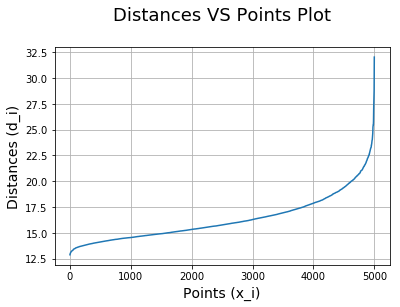

In [72]:
min_points = 2*X_pca.shape[1]

# Computing distances of nth-nearest neighbours
distances = n_neighbour(X_pca,min_points)
sorted_distance = np.sort(distances)
points = [i for i in range(X_pca.shape[0])]

# Draw distances(d_i) VS points(x_i) plot
plt.plot(points, sorted_distance)
plt.xlabel('Points (x_i)',size=15)
plt.ylabel('Distances (d_i)',size=15)
plt.title('Distances VS Points Plot\n',size=20)
plt.grid()
plt.show()

we can see there is a sharp rising in graph at dist=20. so we will take best eps=20

In [81]:
db1 = dbscan(20, min_points,X_pca)

Number of minpoints for cluster = 1000  , Epsilon= 20 and clusters= 2
Labels(-1 is for Noise) :  {0, -1}



In [116]:
text_db=text[0:5000].values

Assigning sparse or noise points to noise cluster and dense points to dense_cluster

In [131]:
noise = []
dense_cluster = []
for i in range(db1.labels_.shape[0]):
    if db1.labels_[i] == -1:
        noise.append(text_db[i])
    else :
        dense_cluster.append(text_db[i])
         
# Number of reviews in different clusters
print("No. of reviews in noise cluster: ",len(noise))
print("No. of reviews in dense cluster : ",len(dense_cluster))


No. of reviews in noise cluster:  46
No. of reviews in dense cluster :  4954


Plotting word cloud for noise points

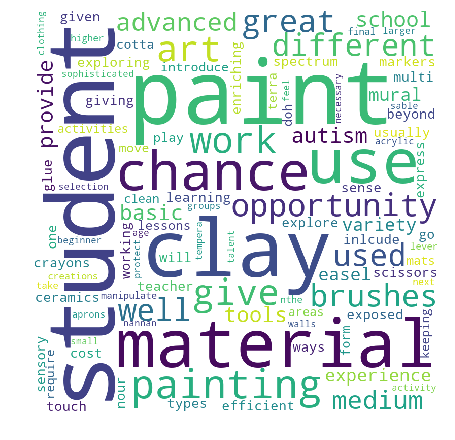

In [121]:
word_cloud(noise)

Observation:
If we observe in noise cluster the most words are materialistic things required by students

Plotting word cloud for dense points

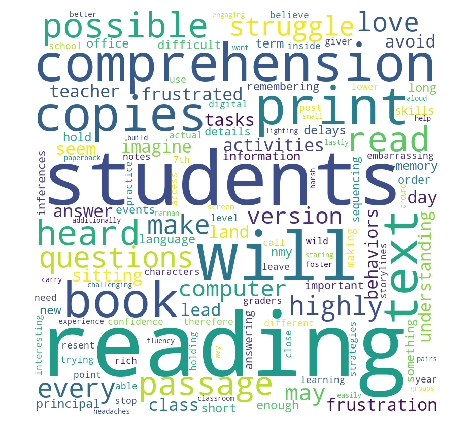

In [122]:
word_cloud(dense_cluster)

Observation:
    here if we see the cluster we can see the words which are more related to qualities which are important for students.There are no materialistic things present in cluster

<h1>3. Conclusions</h1>
<br> Please write down few lines of your observations on this assignment.

In [134]:
from prettytable import PrettyTable
p1 = PrettyTable()
p1.field_names = ["Vectorizer","Model","Optimal_Cluster"]
p1.add_row(['BOW','KMeans',3])
p1.add_row(['BOW','agglomerative',2])
p1.add_row(['BOW','agglomerative',5])
p1.add_row(['BOW','DBSCAN',2])
print(p1)

+------------+---------------+-----------------+
| Vectorizer |     Model     | Optimal_Cluster |
+------------+---------------+-----------------+
|    BOW     |     KMeans    |        3        |
|    BOW     | agglomerative |        2        |
|    BOW     | agglomerative |        5        |
|    BOW     |     DBSCAN    |        2        |
+------------+---------------+-----------------+


Overall Conclusion:
  
        We can see that most project proposals are more student centered as we cn see for most frequent words in reviews are students,learning,computer,reading,book,love,classroom are repeating in every cluster.the materials required by students and project are more focused on improving socil life of students as well.